In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from scipy.stats import boxcox


In [3]:
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston['data'].shape

(506, 13)

In [7]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.filename

'C:\\Users\\595244\\AppData\\Roaming\\Python\\Python37\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
len(boston.target)

506

In [11]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [12]:
df['Price'] = boston.target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

C:\Users\595244\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'CRIM'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'NOX'}>],
       [<AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'RM'}>],
       [<AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'ZN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

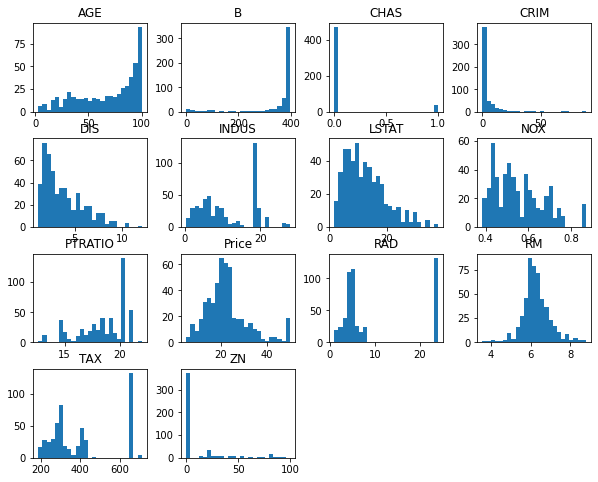

In [15]:
df.hist(grid=False, figsize=(10,8), bins=25)

Three methods can handle skewed data. 
1) Log Transformation (shoule be Non-negative and > 0 values)
2) Square root 
3) BoxCox ( > 0 values)

Skeweness rule of thumb : 
- Fairly Symmetrical	-0.5 to 0.5
- Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
- Highly Skewed	< -1.0 and > 1.0


In [18]:
df.agg(['skew', 'kurt']).transpose()

,skew,kurt
CRIM,5.223149,37.130509
ZN,2.225666,4.031510
INDUS,0.295022,-1.233540
CHAS,3.405904,9.638264
NOX,0.729308,-0.064667
RM,0.403612,1.891500
AGE,-0.598963,-0.967716
DIS,1.011781,0.487941
RAD,1.004815,-0.867232
TAX,0.669956,-1.142408


<AxesSubplot:ylabel='Frequency'>

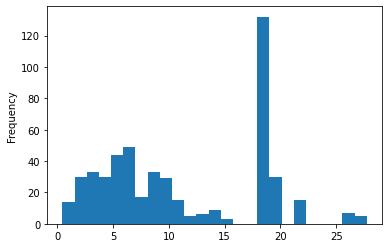

In [63]:
df.INDUS.plot.hist(bins=25)

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Frequency'>

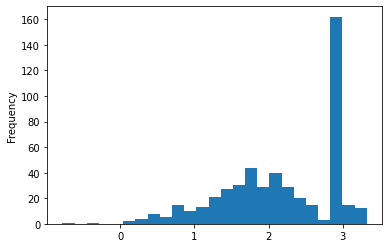

In [64]:
np.log(df.INDUS).plot.hist(bins=25)

In [46]:
pd.Series(stats.boxcox(df['CRIM'])[0]).skew()

<IPython.core.display.Javascript object>

0.09364917268984103

In [54]:
np.isin([0, -1, 1,1,2,3,4,5,6,7], [0]).sum()

<IPython.core.display.Javascript object>

1

<IPython.core.display.Javascript object>

Feature : CRIM, Original skew : 5.223148798243851, Zero count : 0


<IPython.core.display.Javascript object>

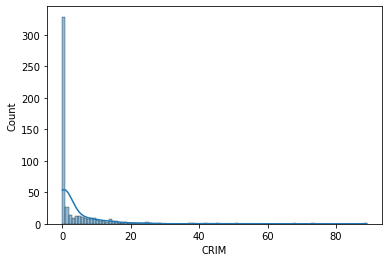

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  1.653100438086046


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

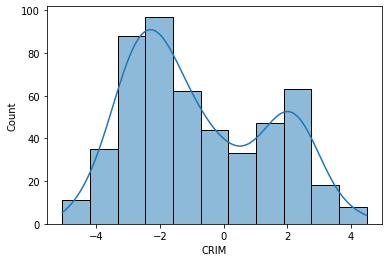

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  2.2854209236470755


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

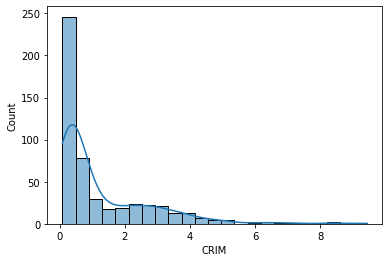

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  0.09364917268984103


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

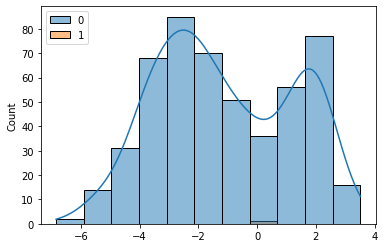

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : ZN, Original skew : 2.2256663227354307, Zero count : 372


<IPython.core.display.Javascript object>

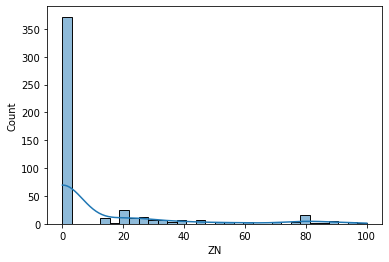

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  0.8000563416780747


<IPython.core.display.Javascript object>

C:\Users\595244\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>

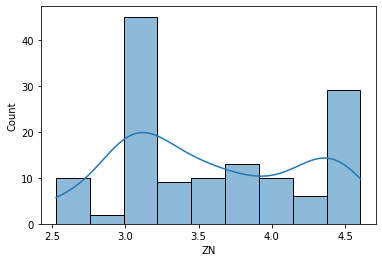

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  1.4918667241866583


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

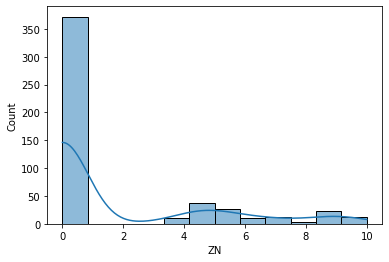

--------------------


<IPython.core.display.Javascript object>

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : INDUS, Original skew : 0.29502156787351164, Zero count : 0


<IPython.core.display.Javascript object>

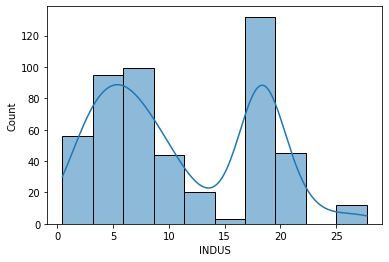

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  -1.2207068138791952


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

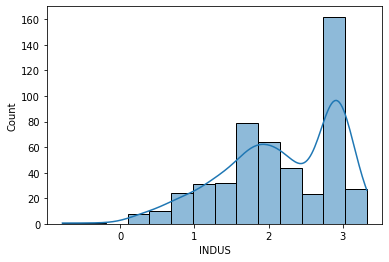

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  0.543158879034037


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

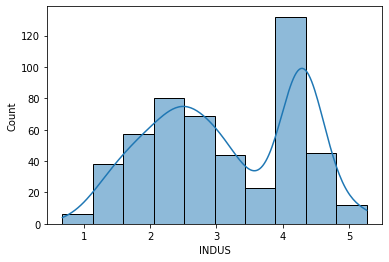

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  -0.13373652528172103


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

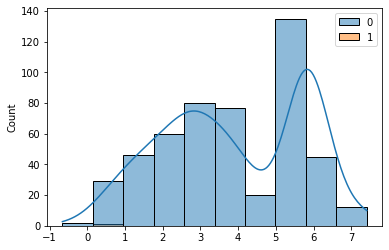

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : CHAS, Original skew : 3.405904172058746, Zero count : 471


<IPython.core.display.Javascript object>

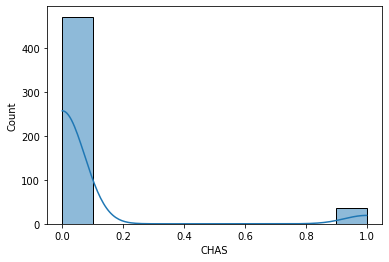

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  1.2255104468061628


<IPython.core.display.Javascript object>

C:\Users\595244\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<IPython.core.display.Javascript object>

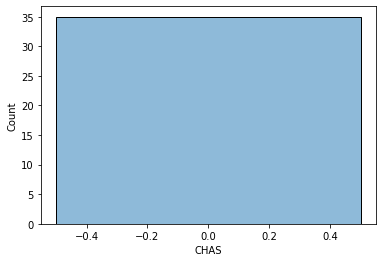

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  1.8455091904563212


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

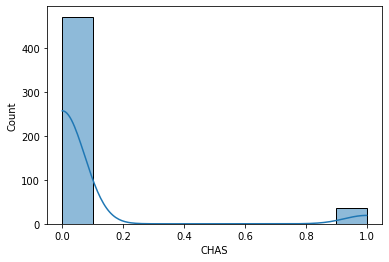

--------------------


<IPython.core.display.Javascript object>

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : NOX, Original skew : 0.7293079225348787, Zero count : 0


<IPython.core.display.Javascript object>

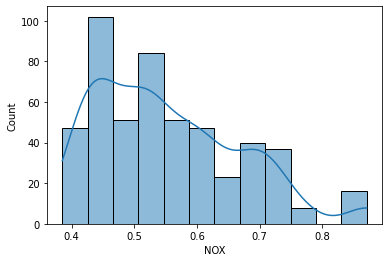

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  -0.3156592458466775


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

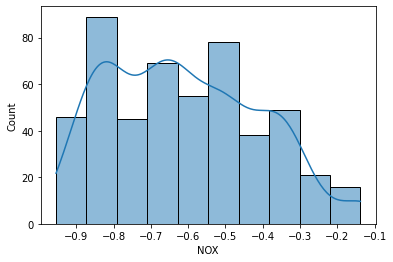

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  0.8539952707918697


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

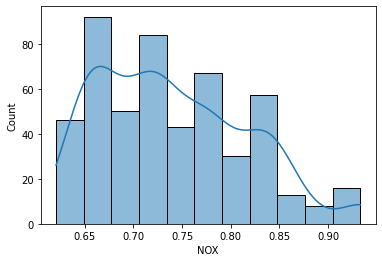

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  0.06094727007661338


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

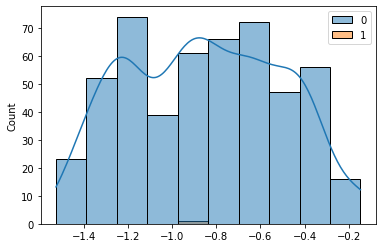

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : RM, Original skew : 0.40361213328874385, Zero count : 0


<IPython.core.display.Javascript object>

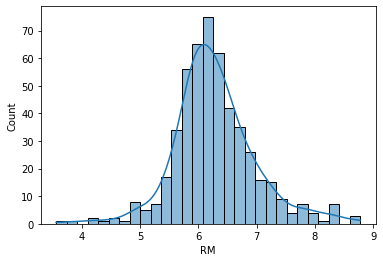

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  -0.9073009282966177


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

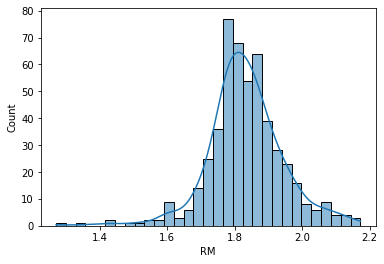

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  0.6353047562302236


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

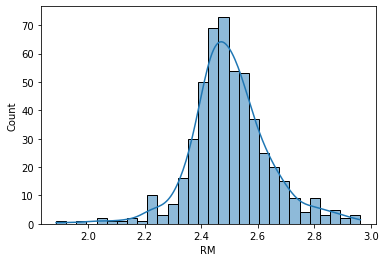

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  0.037050562536116015


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

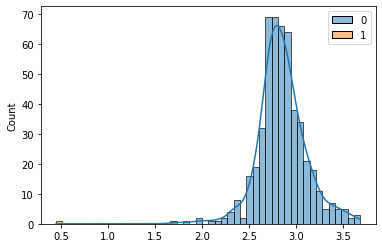

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : AGE, Original skew : -0.5989626398812962, Zero count : 0


<IPython.core.display.Javascript object>

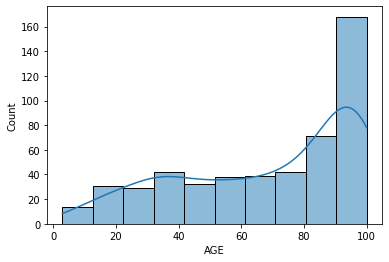

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  nan


C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

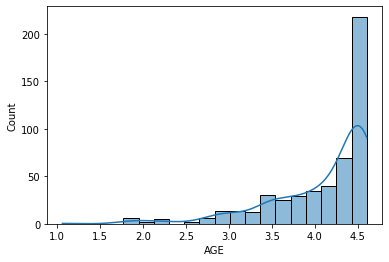

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  nan


C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

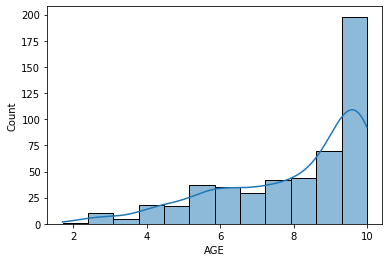

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  -0.4251406231041932


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

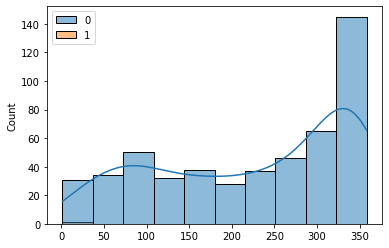

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : DIS, Original skew : 1.0117805793009007, Zero count : 0


<IPython.core.display.Javascript object>

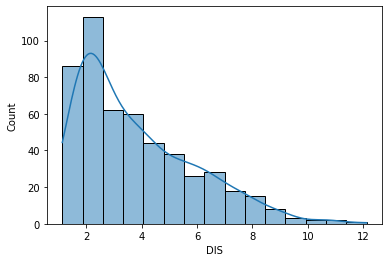

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  0.011711728484036142


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

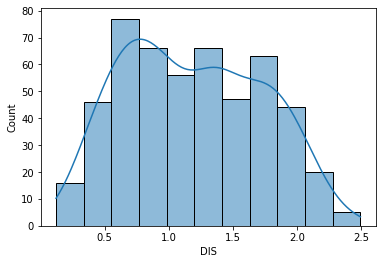

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  1.0058730433314638


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

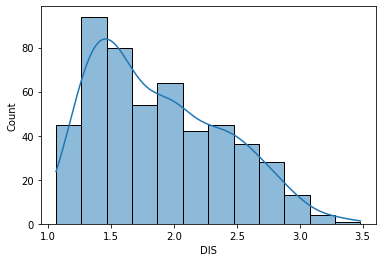

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  0.028653110317067024


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

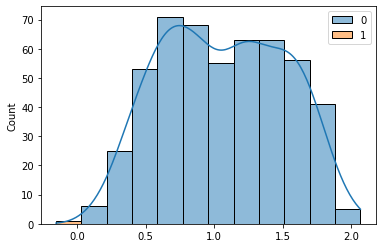

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : RAD, Original skew : 1.0048146482182057, Zero count : 0


<IPython.core.display.Javascript object>

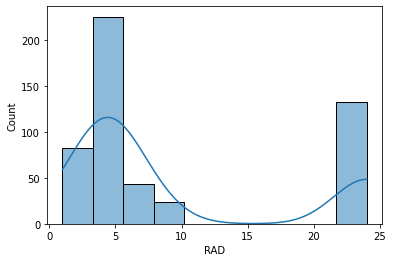

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  0.004803094868176607


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

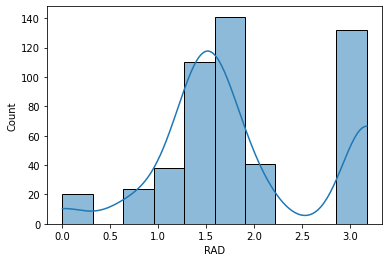

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  1.0024044334589735


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

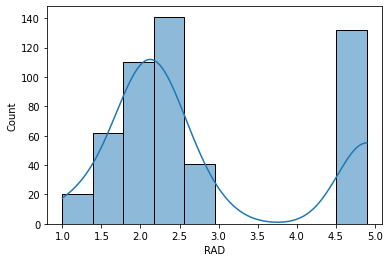

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  0.01743018049865335


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

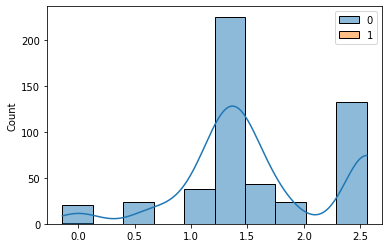

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : TAX, Original skew : 0.669955941795016, Zero count : 0


<IPython.core.display.Javascript object>

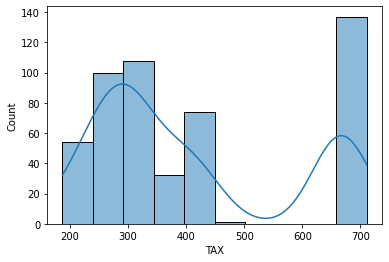

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  -0.40054332727421266


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

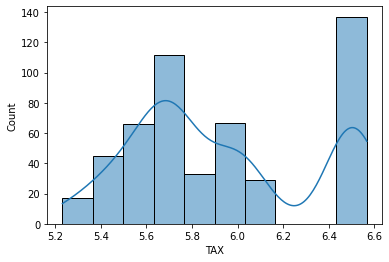

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  0.8185083639126823


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

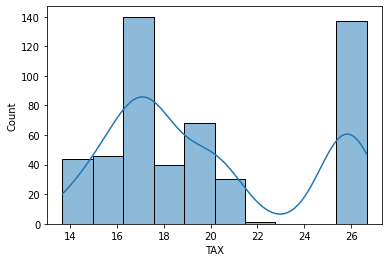

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  0.07920406387459197


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

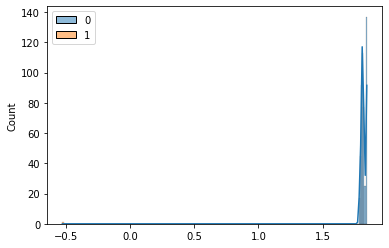

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : PTRATIO, Original skew : -0.8023249268537809, Zero count : 0


<IPython.core.display.Javascript object>

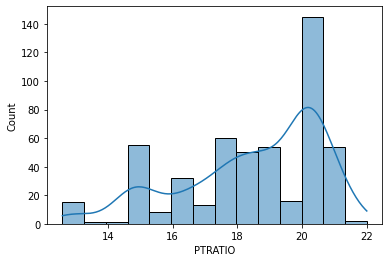

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  nan


C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

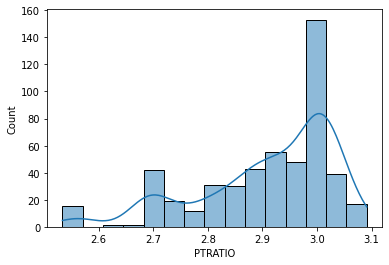

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  nan


C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

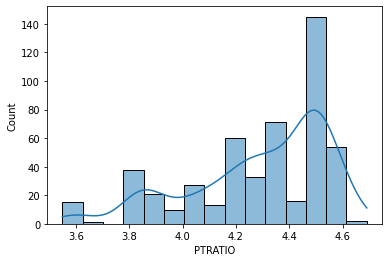

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  -0.2229237459839964


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

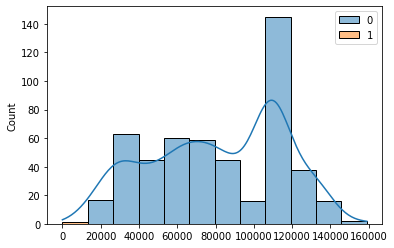

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : B, Original skew : -2.8903737121414492, Zero count : 0


<IPython.core.display.Javascript object>

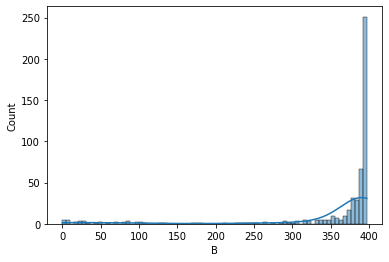

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  nan


C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

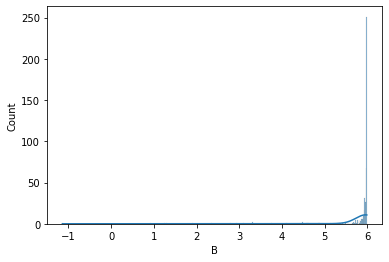

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  nan


C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

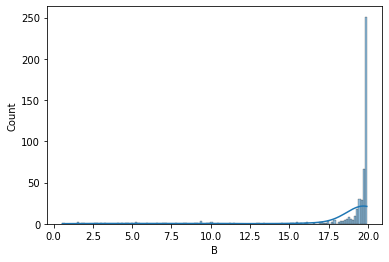

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  -1.931634584880783


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

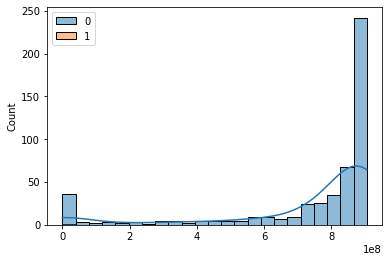

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : LSTAT, Original skew : 0.9064600935915367, Zero count : 0


<IPython.core.display.Javascript object>

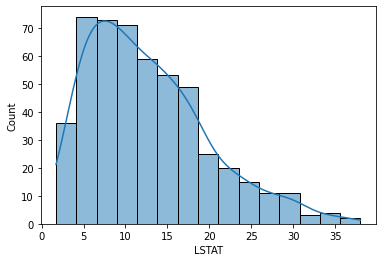

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  -0.09820827226972365


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

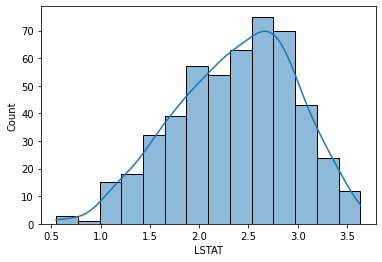

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  0.9520819783986758


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

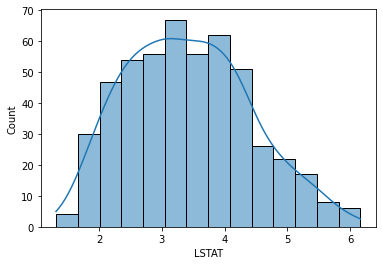

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  -0.02788590379161234


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

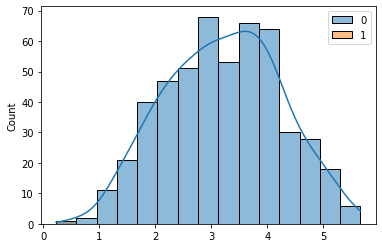

****************************************************************************************************


<IPython.core.display.Javascript object>

Feature : Price, Original skew : 1.1080984082549072, Zero count : 0


<IPython.core.display.Javascript object>

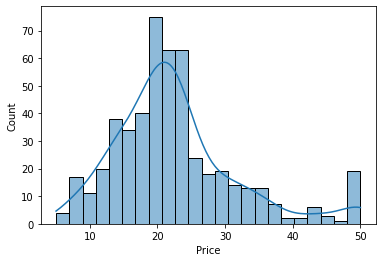

--------------------


<IPython.core.display.Javascript object>

Log Transformation : skew :  0.1026454004957117


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

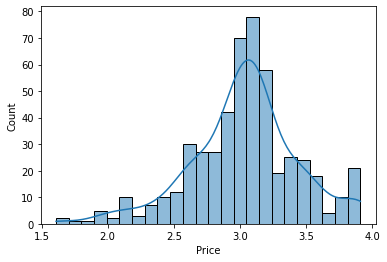

--------------------


<IPython.core.display.Javascript object>

Square Root Transformation : skew :  1.0526625329396442


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

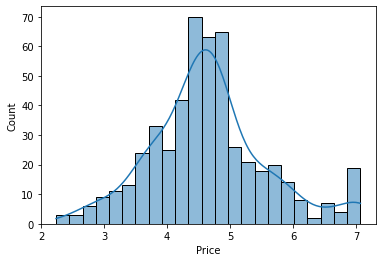

--------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Boxcox Transformation : skew :  0.01588190648477181


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

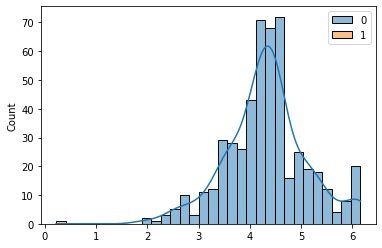

****************************************************************************************************


In [56]:
for col in df.columns:
    print(f'Feature : {col}, Original skew : {df[col].skew()}, Zero count : {np.isin(df[col], [0]).sum()}')
    sns.histplot(df[col], kde=True)
    plt.show()
    
    print('-' * 20)
    print('Log Transformation : skew : ', np.log(df[col].skew()))
    sns.histplot(np.log(df[col]), kde=True)
    plt.show()
    
    print('-' * 20)
    print('Square Root Transformation : skew : ', np.sqrt(df[col].skew()))
    sns.histplot(np.sqrt(df[col]), kde=True)
    plt.show()

    print('-' * 20)
    if(np.isin(df[col], [0]).sum() <= 0):
        print('Boxcox Transformation : skew : ', pd.Series(stats.boxcox(df[col])[0]).skew())
        sns.histplot(stats.boxcox(df[col]), kde=True)
        plt.show()
    
    print('*' * 100)
    